# 感知机模型

## 模型介绍

- 感知机解决的是**二分类问题**，通过在输入空间中将实例划分为正负两类进行判别，属于**判别模型**

# The realization of PLA:
- Reference: 
    - 李航 《统计学习方法》 第二版 第二章
    - 知乎：https://www.zhihu.com/question/26526858/answer/253579695
    

## generate linear separable data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# weights: 直线法向量，numlines: 正整数，创造的数据点数量
def generate_data(weights, numlines):
    w = np.array(weights)
    features = len(w)
    dataset = np.zeros((numlines, features + 1))  # 行为数据点，列为特征的取值，最后一列为样本标签
    for i in range(numlines):
        x = np.random.rand(1, features) * 20 - 10  # 生成一行数据，范围是-10~10
        inner_product = np.sum(w * x)
        if inner_product <= 0:
            dataset[i] = np.append(x, -1)
        else:
            dataset[i] = np.append(x, 1)
    return dataset

In [4]:
def plot_dataset(dataSet):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('Linear separable data set')
    plt.xlabel('X')
    plt.ylabel('Y')
    labels = np.array(dataSet[:,2])
    idx_1 = np.where(dataSet[:,2]==1)
    p1 = ax.scatter(dataSet[idx_1,0], dataSet[idx_1,1], marker='o', color='g', label=1, s=20)
    idx_2 = np.where(dataSet[:,2]==-1)
    p2 = ax.scatter(dataSet[idx_2,0], dataSet[idx_2,1], marker='x', color='r', label=2, s=20)
    plt.legend(loc = 'upper right')

In [5]:
data = generate_data([3,4], 100)

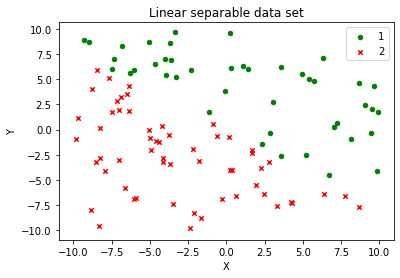

In [6]:
plot_dataset(data)
plt.show()

## Fit model
### Single Class

In [7]:
from sklearn.linear_model import Perceptron
X = data[:,:-1]
y = data[:, -1]

In [8]:
X,y

(array([[-9.71736175,  1.19752117],
        [ 0.31327293,  6.10057296],
        [-4.58471109, -1.11625353],
        [-1.79456749, -3.16560606],
        [ 4.941259  ,  5.55585181],
        [ 6.35196265, -6.38831556],
        [-3.70466784,  8.64726608],
        [ 5.72821856,  4.85554574],
        [-8.85781704, -8.01676166],
        [ 9.05793862,  2.44553974],
        [-3.70106509, -3.40993322],
        [ 9.85670734, -4.11422885],
        [ 3.30470734, -7.63075775],
        [-3.46385042, -7.3628628 ],
        [ 2.26595166, -3.79578708],
        [ 7.06169909,  0.24953296],
        [-0.62373405, -0.66437499],
        [ 3.56658505, -2.62643464],
        [-5.07385271, -0.02534771],
        [ 8.64173658, -7.71852582],
        [ 6.30593114,  7.15759688],
        [-6.6036619 , -5.83260199],
        [-3.73353947, -0.53712188],
        [-0.87799904,  0.57744886],
        [-6.84198427,  8.35741693],
        [-6.49191565,  3.58061976],
        [ 8.68852098,  4.59502909],
        [ 1.96902856, -5.470

In [9]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)
print(clf.score(X, y))
print(clf.coef_)
print(clf.intercept_)

1.0
[[16.84815822 21.47017724]]
[2.]


In [10]:
print(clf.coef_)
print(clf.intercept_)

[[16.84815822 21.47017724]]
[2.]


- for single class: clf.coef_[0] is the weight vector and clf.intercept_[0] is the intercept

In [11]:
coefs = clf.coef_[0]
intercept = clf.intercept_[0]

- use the model

In [12]:
f = np.dot(X, coefs) + intercept
sign = np.where(f > 0, 1, 0)
print(sign, y)

[0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1
 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0] [-1.  1. -1. -1.  1. -1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1.  1.
 -1. -1.  1. -1. -1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1. -1.  1. -1.
  1.  1. -1. -1. -1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1.
 -1.  1. -1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1.  1.  1.  1.  1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1.  1.  1.  1.
  1. -1. -1. -1.  1. -1.  1.  1.  1. -1.]


- or use api by sklearn:

In [13]:
clf.predict(X)

array([-1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,
       -1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1.,  1., -1.,
        1., -1.,  1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,
       -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,
       -1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,
       -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,
       -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.])